In [3]:
from sympy import *
from sympy.vector import Vector
from sympy.vector import CoordSys3D
import itertools
N = CoordSys3D('N')

s, t, k, l, d, z = symbols( 's t k l d z' )
init_printing(use_unicode=True)

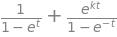

In [4]:
def Exp(t):
    return exp( 2*pi*I*t )

def SmoothSum1(t):
    return 1 / ( 1 - exp(t) ) 

def SmoothSum2(t):
    return exp(k*t) / ( 1 - exp(-t) )

#def Sum3(t):
#    return exp(t)*( Rational(1,2) ) * ( 1 / ( ( 1 - exp( Rational(5,2)*t ) ) * ( 1 - exp( Rational(-1,2)*t ) ) )  + 1 / ( ( 1 + #exp( Rational(5,2)*t ) ) * ( 1 + exp(Rational(-1,2)*t ) ) ) ) 

def SmoothSum(t):
    return SmoothSum1(t) + SmoothSum2(t)

SmoothSum(t)

Expand the sum as a series around $t = 0:$

In [5]:
def SeriesSum(t):
    return series(SmoothSum(t), t, 0)

SeriesSum(t)

In [6]:
def LimitSmoothSum(t):
    return limit(SmoothSum(t), t, 0)

LimitSmoothSum(t)

For hypertoric:

In [7]:
def CoreSum0(t,k):
    return 1 / ( ( 1 - exp(t) ) * ( 1 - exp(-t ) ) ) 

def CoreSum1(t,k):
    return exp(k*t) / ( ( 1 - exp(t) ) * ( 1 - exp(-t) ) )

def ExtendedSum0(t,k,d):
    return exp(-d*t) / ( ( 1 - exp(t) ) * ( 1 - exp(t) ) )

def ExtendedSum1(t,k,d):
    return exp((k + d)*t) / ( ( 1 - exp(-t) ) * ( 1 - exp(-t) ) )


def ExtendedSum(t,k,d):
    return CoreSum0(t,k) + CoreSum1(t,k) + ExtendedSum0(t,k,d) + ExtendedSum1(t,k,d)

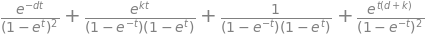

In [8]:
ExtendedSum(t,k,d)

In [9]:
def ExtendedSeriesSum(t,k,d):
    return series(ExtendedSum(t,k,d), t, 0)

ExtendedSeriesSum(t,k,d)

In [11]:
def ExtendedLimitSum(k,d):
    return limit(ExtendedSum(t,k,d), t, 0)

factor(ExtendedLimitSum(k,d))

In [26]:
def NonConvexCoreSum0(t,k):
    return 1 / ( ( 1 - exp(t) ) * ( 1 - exp(-t ) ) ) 

def NonConvexCoreSum1(t,k):
    return exp(k*t) / ( ( 1 - exp(t) ) * ( 1 - exp(-t) ) )

def NonConvexCoreSum2(t,k,l):
    return exp((k+l)*t) / ( ( 1 - exp(t) ) * ( 1 - exp(-t) ) )

def NonConvexExtendedSum0(t,k,l,d):
    return exp(-2*d*t) / ( ( 1 - exp(t) ) * ( 1 - exp(t) ) )

def NonConvexExtendedSum1(t,k,l,d):
    return ( exp((k + l + d)*t) / 2 ) * ( ( 1 / ( ( 1 - exp(-t) ) * ( 1 - exp(-t/2) ) ) ) + ( 1 / ( ( 1 - exp(pi*I)*exp(-t) ) * ( 1 - exp(pi*I)*exp(-t/2) ) ) ) )

def NonConvexSum(t,k,l,d):
    return NonConvexCoreSum0(t,k) + NonConvexCoreSum1(t,k) + NonConvexCoreSum2(t,k,l) + NonConvexExtendedSum0(t,k,l,d) + NonConvexExtendedSum1(t,k,l,d)

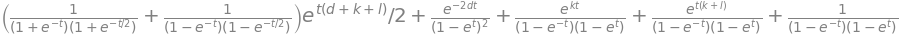

In [27]:
NonConvexSum(t,k,l,d)

In [28]:
def NonConvexLimitSum(k,l,d):
    return limit(NonConvexSum(t,k,l,d), t, 0)

NonConvexLimitSum(k,l,d)

In [15]:
Points(3)

In [16]:
Points(4)